In [1]:
# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

In [2]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = None, 
                                     depends_on = None,
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [3]:
parameter_dict

{'a': 0.6799841376040081,
 'v': 0.42971405473533975,
 'z': 0.6325147503699644,
 't': 2.0671081138371132}

In [5]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': logit_link},
              {'model': 'v ~ 1', 'link_func': identity_link}]

#reg_models = [{'model': 'z ~ 1', 'link_func': logit_link}]

hddm_models_test = []
hddm_models_test_reg = []
n_models = 1

for i in range(n_models):
    hddm_models_test_reg.append(hddm.HDDMRegressor(data,
                                                   reg_models,
                                                   informative = True,
                                                   is_group_model = False,
                                                   group_only_regressors = False,
                                                   include = ['z'],
                                                   p_outlier = 0))
    hddm_models_test.append(hddm.HDDM(data,
                                      informative = True,
                                      is_group_model = False,
                                      include = ['z'],
                                      p_outlier = 0))
    
# Sample
nmcmc = 1000
for i in range(1):
    print(i)
    hddm_models_test_reg[i].sample(nmcmc,
                               burn = 500)
    
    hddm_models_test[i].sample(nmcmc,
                          burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1000 of 1000 complete in 8.3 secc

In [7]:
hddm_models_test[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.16005,0.0177989,1.12664,1.14797,1.15952,1.17169,1.19702,0.000818251
v,0.828336,0.0776837,0.679348,0.773464,0.826395,0.883063,0.976518,0.00397469
t,0.954086,0.000966253,0.952086,0.95344,0.954169,0.954757,0.955798,4.4471e-05
z,0.214981,0.00781785,0.200121,0.20946,0.215001,0.22047,0.229933,0.000454331


Plotting a
Plotting v
Plotting t
Plotting z


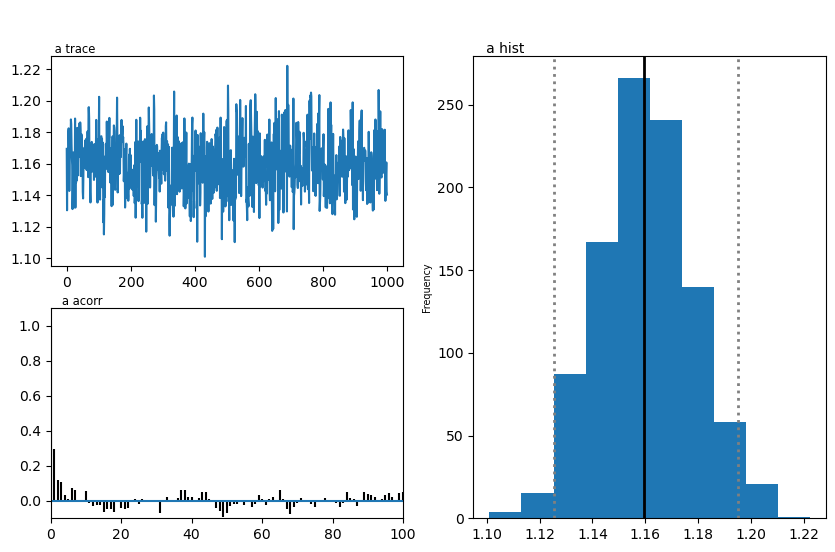

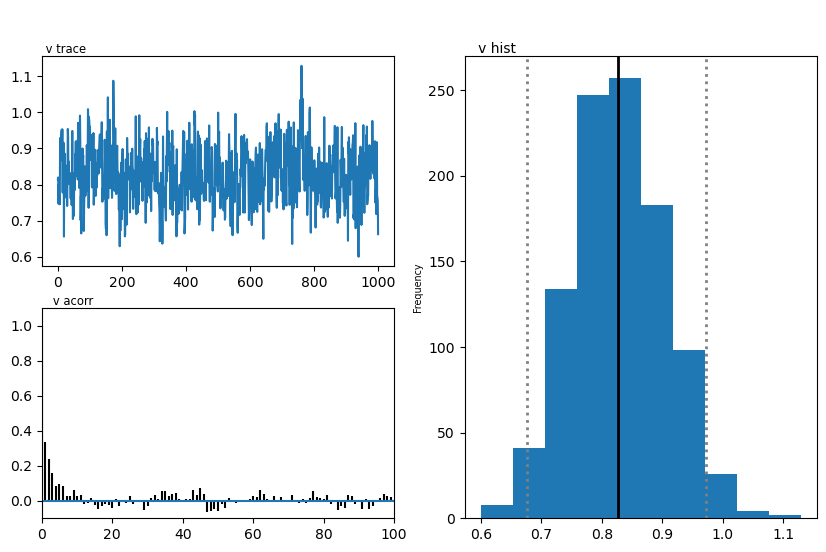

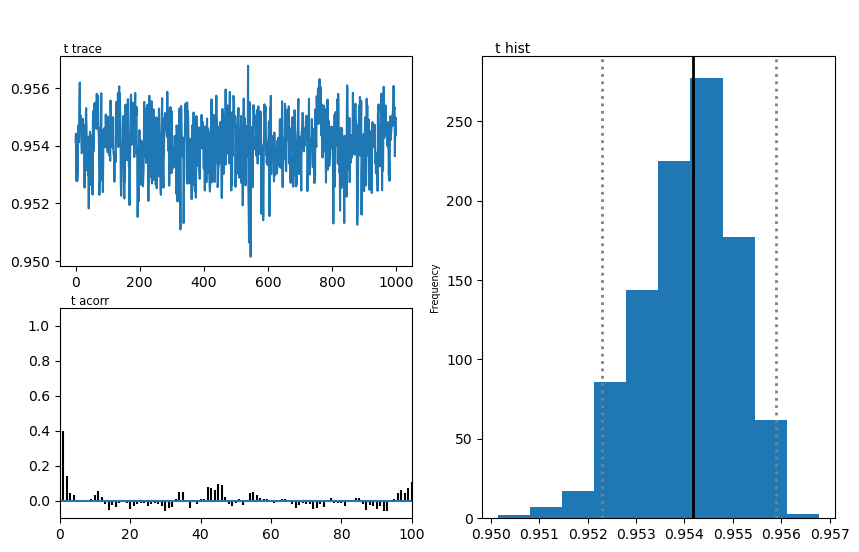

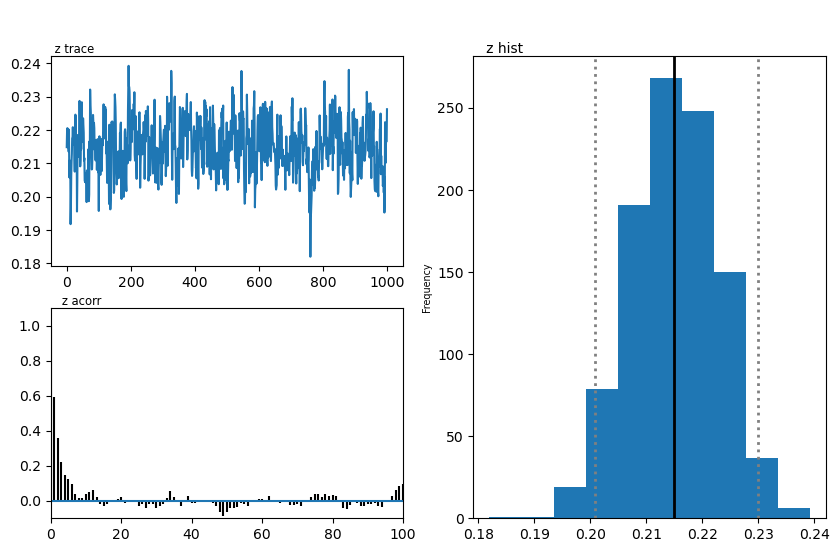

In [8]:
hddm_models_test[0].plot_posteriors()
plt.show()

In [9]:
hddm_models_test_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.16101,0.017951,1.12576,1.14895,1.16115,1.17278,1.1975,0.000766323
t,0.95419,0.000893937,0.952371,0.953606,0.954211,0.954853,0.95588,4.47806e-05
z_Intercept,-1.30517,0.0443506,-1.38987,-1.33725,-1.30533,-1.27522,-1.22064,0.00247544
v_Intercept,0.833684,0.0724028,0.694548,0.786746,0.834317,0.87853,0.984299,0.00325441


In [11]:
1 / (1 + np.exp(+1.305))

0.21332472781586043

In [57]:
np.log(0.03 / ( 1 - 0.03))

-3.4760986898352733

Plotting a
Plotting t
Plotting z_Intercept
Plotting v_Intercept


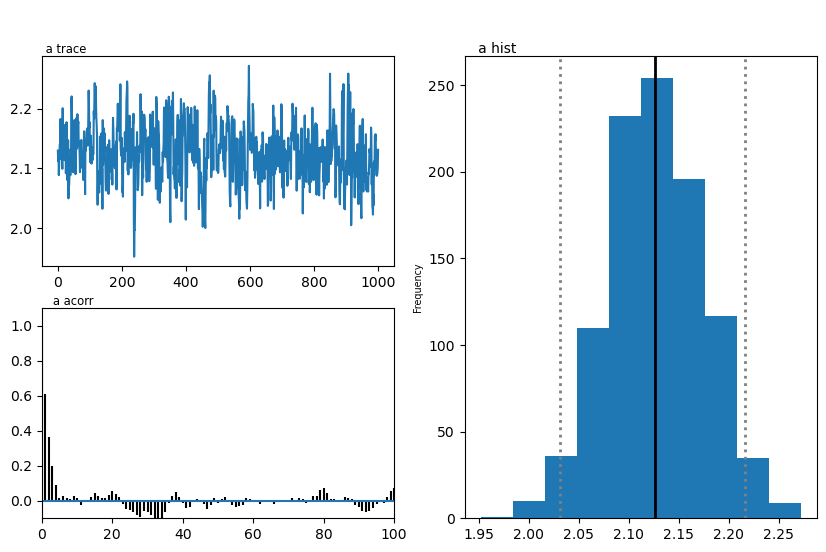

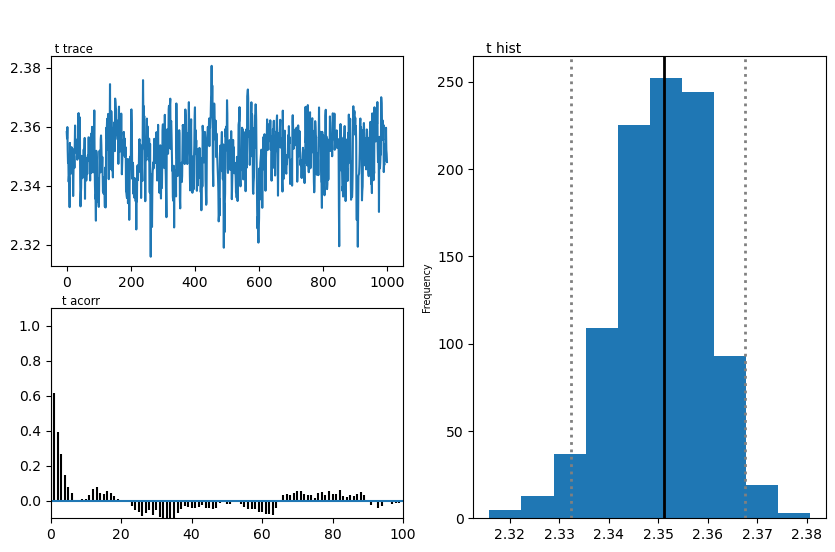

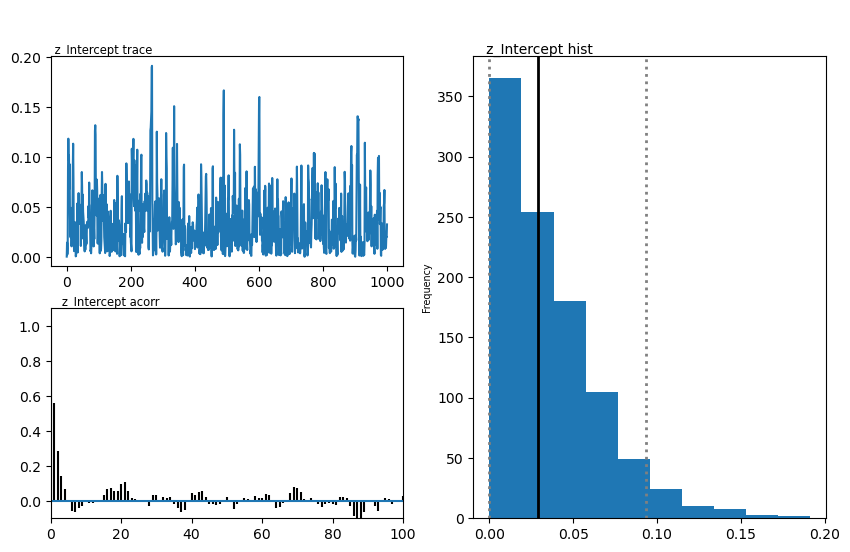

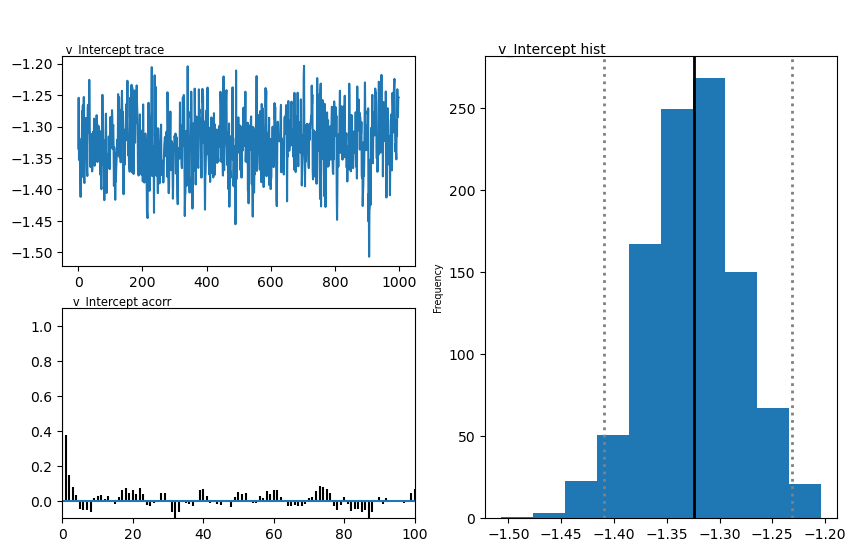

In [58]:
hddm_models_test_reg[0].plot_posteriors()
plt.show()

In [12]:
# Posterior Predictive
# FIX: IMPROVE LABELING
hddm.plotting.plot_posterior_predictive(model = hddm_models_test_reg[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.1),
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.4,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3}})
#

<Figure size 800x600 with 0 Axes>

In [13]:
plt.show()

           rt
0    2.245108
1    2.144108
2   -2.083108
3    2.086108
4    2.090108
..        ...
995  2.200108
996  2.112108
997  2.291108
998  2.111108
999 -2.288108

[1000 rows x 1 columns]


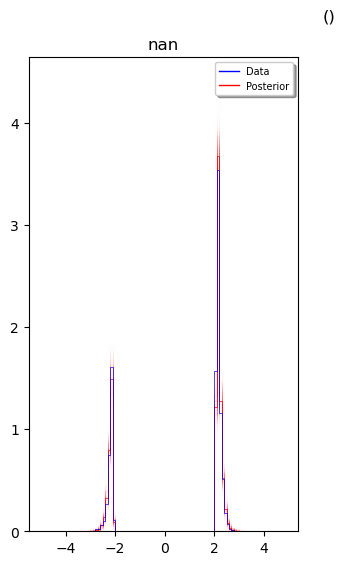

In [13]:
# Posterior Predictive
# FIX: IMPROVE LABELING
hddm.plotting.plot_posterior_predictive(model = hddm_models_test_reg[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.05),
                                        parameter_recovery_mode = False,
                                        required_method="random",
                                        plot_func = hddm.plotting._plot_func_posterior_node_from_sim,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.1,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3},
                                           'posterior_uncertainty_color': 'red'})
#

In [12]:
"response" in data.columns

True